## Importing fashion mnist dataset
We will be working on the dataset in an unsupervised way, i.e., will ignore the labels and work on training examples only.

In [ ]:
from keras.datasets import fashion_mnist

## Importing all the libraries

In [ ]:
import keras
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Input
#from keras.initializers import VarianceScaling
#from keras.engine.topology import Layer, InputSpec

#from sklearn.metrics import accuracy_score, normalized_mutual_info_score

### Downloading the Image data and reading it in numpy format

In [ ]:
(train_X, train_Y), (val_X, val_Y) = fashion_mnist.load_data()

## Preprocessing of data for feeding it into the network -

In [ ]:
# converting all the pixel values from range(0 to 255) to range(0,1)
train_X = train_X/255.
val_X = val_X/255.

#converting the Image data into values of pixels, i.e. - image of dimension 28 X 28 to single row of 784 pixels(28x28 = 784).
print("Dimension of training data before reshaping",train_X.shape)
train_X = train_X.reshape(-1, 784)
val_X = val_X.reshape(-1, 784)
print("Dimension of training data after reshaping",train_X.shape)

Dimension of training data before reshaping (60000, 28, 28)
Dimension of training data after reshaping (60000, 784)


# Defining Autoencoder Model

In [ ]:
#!pip install -q tensorflow==1.0.0-beta1
#defining input placeholder for autoencoder model
input_img = Input(shape=(784,))

# "enc_rep" is the encoded representation of the input
enc_rep = Dense(2000, activation='relu')(input_img)
enc_rep = Dense(500, activation='relu')(enc_rep)
enc_rep = Dense(500, activation='relu')(enc_rep)
enc_rep = Dense(10, activation='sigmoid')(enc_rep)

# "decoded" is the lossy reconstruction of the input from encoded representation
decoded = Dense(500, activation='relu')(enc_rep)
decoded = Dense(500, activation='relu')(decoded)
decoded = Dense(2000, activation='relu')(decoded)
decoded = Dense(784)(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# Structure of our autoencoder model -

In [ ]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2000)                │       1,570,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │       1,000,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 500)                 │           5,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 2000)                │       1,002,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 784)                 │       1,568,784 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,652,794 (21.56 MB)

 Trainable params: 5,652,794 (21.56 MB)

 Non-trainable params: 0 (0.00 B)

## Compiling our model

In [ ]:
autoencoder.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7), loss='mse')

## To enable early stropping in our model...
monitoring the validation loss and patience = 10 means for 10 continuous epochs, if validation loss will not be improved then it will stop there.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')


## to train autoencoder on training data and validate on validation data

In [ ]:
#t_h = autoencoder.fit(train_X, train_X, epochs=500, batch_size=2048, validation_data=(val_X, val_X), callbacks=[early_stopper])
t_h = autoencoder.fit(train_X, train_X, epochs=500, batch_size=2048, validation_data=(val_X, val_X))

Epoch 1/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - loss: 0.1179 - val_loss: 0.0712
Epoch 2/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0674 - val_loss: 0.0505
Epoch 3/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0466 - val_loss: 0.0399
Epoch 4/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0389 - val_loss: 0.0352
Epoch 5/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0343 - val_loss: 0.0307
Epoch 6/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0301 - val_loss: 0.0274
Epoch 7/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0272 - val_loss: 0.0249
Epoch 8/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0246 - val_loss: 0.0235
Epoch 9/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0233 - val_loss: 0.0227
Epoch 10/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0220 - val_loss: 0.0211
Epoch 11/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0210 - val_loss: 0.0202
Epoch 12/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/ste

## To predict images...

In [ ]:
# to predict the reconstructed images for the original images...
pred = autoencoder.predict(val_X)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


# To compare the original and reconstructed images....

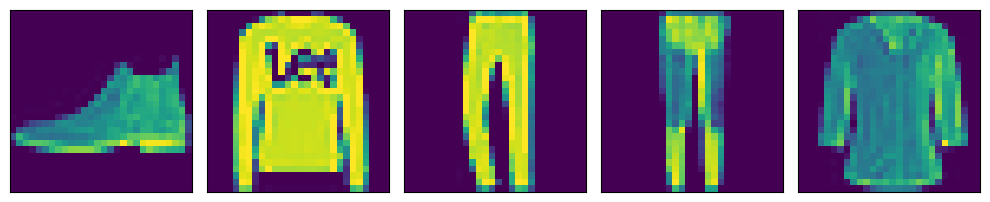

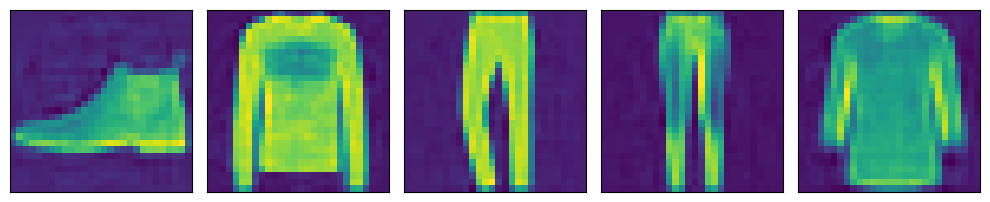

In [ ]:
import matplotlib.pyplot as plt
# to visualize original images
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([]) # to remove x-axis  the [] empty list indicates this
    plt.yticks([]) # to remove y-axis
    plt.grid(False) # to remove grid
    plt.imshow(val_X[i].reshape(28, 28)) #display the image
plt.tight_layout() # to have a proper space in the subplots
plt.show()

# to visualize reconstructed images(output of autoencoder)
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([]) # to remove x-axis  the [] empty list indicates this
    plt.yticks([]) # to remove y-axis
    plt.grid(False) # to remove grid
    plt.imshow(pred[i].reshape(28, 28)) #display the image
plt.tight_layout() # to have a proper space in the subplots
plt.show()